In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, SGDRegressor
from scipy.stats import boxcox
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import (StandardScaler, MinMaxScaler,
                                   PolynomialFeatures, RobustScaler)
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_predict, train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import statsmodels.api as sm
from sklearn.metrics import accuracy_score

In [34]:
df = pd.read_csv('train.csv', sep =';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,6.6,0.3,0.36,1.2,0.035,43,126,0.9909,3.01,0.63,11.4,6,white
1,7.7,0.5,0.26,1.9,0.062,9,31,0.9966,3.39,0.64,9.6,5,red
2,8.4,0.5,0.35,2.9,0.076,21,127,0.9976,3.23,0.63,9.2,5,red
3,7.5,0.4,0.33,5.0,0.045,30,131,0.9942,3.32,0.44,10.9,6,white
4,6.4,0.2,0.25,20.2,0.083,35,157,0.9998,3.17,0.50,9.1,5,white


In [35]:
df1 = df.drop_duplicates()
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,6.6,0.3,0.36,1.2,0.035,43,126,0.9909,3.01,0.63,11.4,6,white
1,7.7,0.5,0.26,1.9,0.062,9,31,0.9966,3.39,0.64,9.6,5,red
2,8.4,0.5,0.35,2.9,0.076,21,127,0.9976,3.23,0.63,9.2,5,red
3,7.5,0.4,0.33,5.0,0.045,30,131,0.9942,3.32,0.44,10.9,6,white
4,6.4,0.2,0.25,20.2,0.083,35,157,0.9998,3.17,0.50,9.1,5,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6708,7.1,0.5,0.03,2.6,0.076,21,92,0.9975,3.50,0.60,9.8,5,red
6709,7.2,0.2,0.19,7.7,0.045,53,176,0.9958,3.17,0.38,9.5,5,white
6710,6.7,0.3,0.34,7.5,0.036,39,124,0.9912,2.99,0.32,12.4,8,white
6712,8.0,0.2,0.31,5.6,0.049,24,97,0.9930,3.10,0.42,10.9,5,white


In [36]:
test = pd.read_csv('test.csv', sep =';')
test.head()

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,1257,7.2,0.25,0.37,2.5,0.063,11.0,41.0,0.99439,3.52,0.80,12.4,red
1,6409,8.2,0.27,0.39,7.8,0.039,49.0,208.0,0.99760,3.31,0.51,9.5,white
2,136,8.9,0.32,0.49,1.6,0.050,17.0,131.0,0.99560,3.13,0.34,9.4,white
3,1631,7.4,0.16,0.30,13.7,0.056,33.0,168.0,0.99825,2.90,0.44,8.7,white
4,6084,6.4,0.28,0.56,1.7,0.156,49.0,106.0,0.99354,3.10,0.37,9.2,white


In [37]:
id = test['id']
test = test.drop(columns = ['id'])
test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,7.2,0.25,0.37,2.5,0.063,11.0,41.0,0.99439,3.52,0.80,12.4,red
1,8.2,0.27,0.39,7.8,0.039,49.0,208.0,0.99760,3.31,0.51,9.5,white
2,8.9,0.32,0.49,1.6,0.050,17.0,131.0,0.99560,3.13,0.34,9.4,white
3,7.4,0.16,0.30,13.7,0.056,33.0,168.0,0.99825,2.90,0.44,8.7,white
4,6.4,0.28,0.56,1.7,0.156,49.0,106.0,0.99354,3.10,0.37,9.2,white
...,...,...,...,...,...,...,...,...,...,...,...,...
815,6.1,0.30,0.56,2.7,0.046,46.0,184.0,0.99240,3.31,0.57,10.9,white
816,6.7,0.33,0.34,6.6,0.067,35.0,156.0,0.99542,3.11,0.48,9.3,white
817,8.3,0.26,0.37,1.4,0.076,8.0,23.0,0.99740,3.26,0.70,9.6,red
818,6.3,0.29,0.29,3.3,0.037,32.0,140.0,0.98950,3.17,0.36,12.8,white


In [38]:
#X_test = pd.get_dummies(test, columns = ['type'])

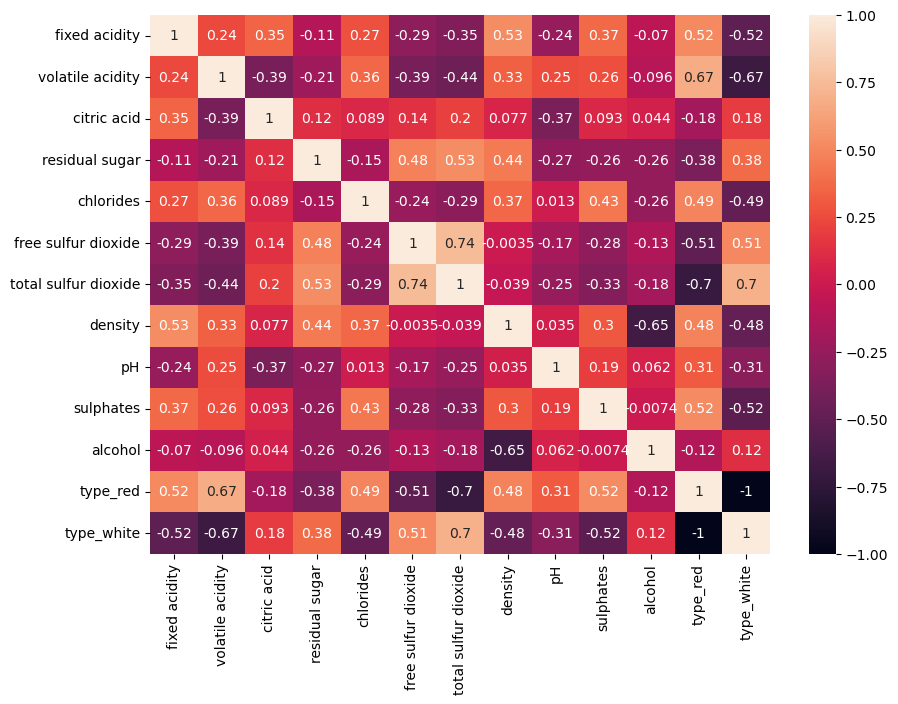

In [39]:

plt.figure(figsize = (10,7))
sns.heatmap(X_test.corr() , annot = True)
plt.show()

In [40]:

one_hot_encoded_data = pd.get_dummies(df1, columns = ['type'])
one_hot_encoded_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
0,6.6,0.3,0.36,1.2,0.035,43,126,0.9909,3.01,0.63,11.4,6,0,1
1,7.7,0.5,0.26,1.9,0.062,9,31,0.9966,3.39,0.64,9.6,5,1,0
2,8.4,0.5,0.35,2.9,0.076,21,127,0.9976,3.23,0.63,9.2,5,1,0
3,7.5,0.4,0.33,5.0,0.045,30,131,0.9942,3.32,0.44,10.9,6,0,1
4,6.4,0.2,0.25,20.2,0.083,35,157,0.9998,3.17,0.50,9.1,5,0,1


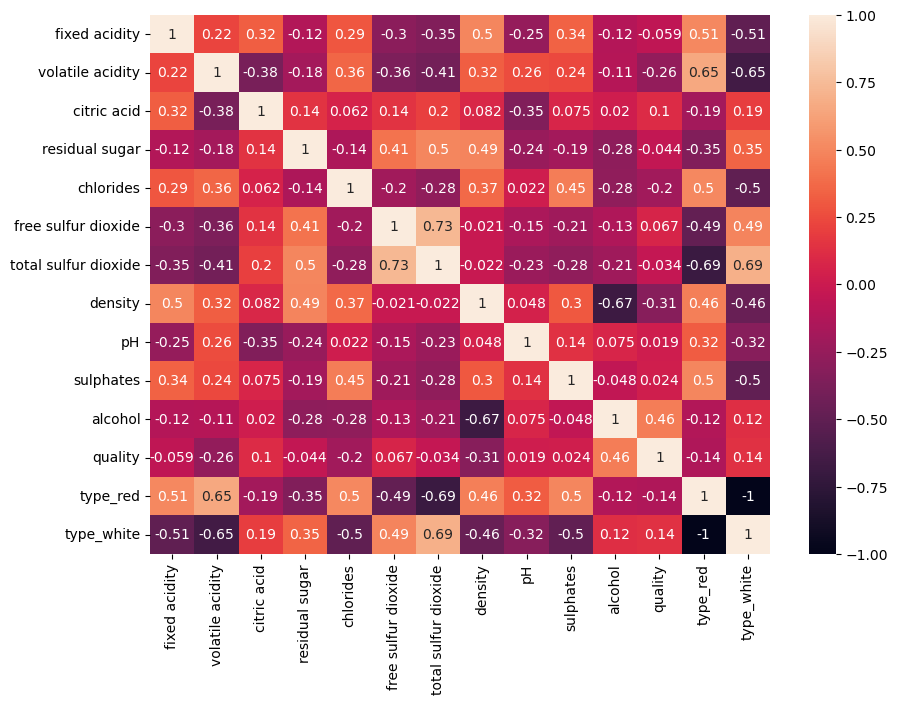

In [41]:
plt.figure(figsize = (10,7))
sns.heatmap(one_hot_encoded_data.corr() , annot = True)
plt.show()

In [42]:
y = one_hot_encoded_data['quality']
X = one_hot_encoded_data.drop(columns = ['quality'])

In [43]:
mm = MinMaxScaler()
poly = PolynomialFeatures(degree = 2, include_bias = False)
X_train_mm = mm.fit_transform(X)
X_test_mm = mm.transform(X_test)
X_train_poly = poly.fit_transform(X_train_mm)
X_test_poly = poly.transform(X_test_mm)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
def forward_selection(X, y, k):
    selected_features = []
    for i in range(X.shape[1]):
        if len(selected_features) == k:
            break
        best_score = 0
        for feature in selected_features:
            X_train_subset = X_train[:, [feature, i]]
            model = LogisticRegression()
            model.fit(X_train_subset, y_train)
            score = accuracy_score(y_test, model.predict(X_test[:, [feature, i]]))
            if score > best_score:
                best_score = score
        if best_score > 0:
            selected_features.append(i)
    return selected_features

# Perform forward selection to select the top 2 features
selected_features = forward_selection(X, y, 2)
selected_features

[]

In [13]:

sgd_reg = SGDRegressor(eta0=0.01, max_iter=1000, tol=1e-3)
sgd_reg.fit(X_train_poly, y)

SGDRegressor()

In [14]:
predicted = sgd_reg.predict(X_test_poly)

In [16]:
data = {'id': id, 'quality': predicted}

In [17]:
dataframe = pd.DataFrame(data)
csv_filename = 'results5.csv'
dataframe.to_csv(csv_filename, index = False)
print(f'DataFrame saved to {csv_filename}')

DataFrame saved to results5.csv
